In [34]:
# importamos librerias a utilizar
%matplotlib inline
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

# manejo de fechas
today = date.today()
one_day = today - timedelta(days=2)
two_day = today - timedelta(days=3)
yesterday = one_day.strftime("%m-%d-%Y")
last_yesterday = two_day.strftime("%m-%d-%Y")

# setting fechas a utilizar
end_date = date(one_day.year, one_day.month, one_day.day)
start_date = date(two_day.year, two_day.month, two_day.day)
daterange = pd.date_range(start_date, end_date)

# ciclo for para descargar archivos .csv del repositorio de Github
for single_date in daterange:
    fecha = single_date.strftime("%m-%d-%Y")
    download_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+fecha+".csv"
    target_csv_path = "data/"+fecha+".csv"
    response = requests.get(download_url)
    response.raise_for_status()
    with open(target_csv_path,"wb") as f:
        f.write(response.content)
    print("CSV con fecha "+fecha+" descargado correctamente")

CSV con fecha 07-26-2021 descargado correctamente
CSV con fecha 07-27-2021 descargado correctamente


In [35]:
# lectura de archivos
report_covid_today = pd.read_csv("data/"+yesterday+".csv",usecols = (2,3,4,7,8,9,10))
report_covid_yesterday = pd.read_csv("data/"+last_yesterday+".csv",usecols = (2,3,4,7,8,9,10))

# Actual datos covid de UN día, resta entre el hoy y ayer

# confirmed = casos_confirmados_hoy - casos_confirmados_ayer
confirmed = report_covid_today['Confirmed'] - report_covid_yesterday['Confirmed']
deaths = report_covid_today['Deaths'] - report_covid_yesterday['Deaths']
recovered = report_covid_today['Recovered'] - report_covid_yesterday['Recovered']
active = report_covid_today['Active'] - report_covid_yesterday['Active']

In [36]:
#1 Mostrar todos los datos recopilados de un CSV por pantalla.

report_covid_today

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,2021-07-28 04:21:39,145008,6515,82586.0,55907.0
1,NaN,Albania,2021-07-28 04:21:39,132922,2456,130166.0,300.0
2,NaN,Algeria,2021-07-28 04:21:39,165204,4112,112050.0,49042.0
3,NaN,Andorra,2021-07-28 04:21:39,14586,127,14113.0,346.0
4,NaN,Angola,2021-07-28 04:21:39,42110,994,35742.0,5374.0
...,...,...,...,...,...,...,...
3982,NaN,Vietnam,2021-07-28 04:21:39,117121,524,22946.0,93651.0
3983,NaN,West Bank and Gaza,2021-07-28 04:21:39,316189,3600,311560.0,1029.0
3984,NaN,Yemen,2021-07-28 04:21:39,7022,1374,4168.0,1480.0
3985,NaN,Zambia,2021-07-28 04:21:39,192956,3316,183534.0,6106.0


In [37]:
#2 Información sobre el conjunto de datos (número de columnas, tipos de datos, entre otros).

print('Dimensión: ', report_covid_today.shape)
print('Número datos: ', report_covid_today.size)
print('Columnas: ', report_covid_today.columns.size)
print('Filas: ', report_covid_today.index.size)
print('Tipo datos: ', report_covid_today.dtypes)

Dimensión:  (3987, 7)
Número datos:  27909
Columnas:  7
Filas:  3987
Tipo datos:  Province_State     object
Country_Region     object
Last_Update        object
Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
dtype: object


In [38]:
#3 Información sobre los datos faltantes dentro del conjunto de datos (datos en blanco).

print("Empty information Province_State: ", report_covid_today.Province_State.isna().sum())
print("Empty information Country_Region: ", report_covid_today.Country_Region.isna().sum())
print("Empty information Last_Update: ", report_covid_today.Last_Update.isna().sum())
print("Empty information Confirmed: ", report_covid_today.Confirmed.isna().sum())
print("Empty information Deaths: ", report_covid_today.Deaths.isna().sum())
print("Empty information Recovered: ", report_covid_today.Recovered.isna().sum())
print("Empty information Active: ", report_covid_today.Active.isna().sum())

Empty information Province_State:  174
Empty information Country_Region:  0
Empty information Last_Update:  0
Empty information Confirmed:  0
Empty information Deaths:  0
Empty information Recovered:  3277
Empty information Active:  3278


In [39]:
#4 Número de casos confirmados, fallecidos, recuperados y activos por país/región.

country_covid = report_covid_today.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum()
country_covid.head(10)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,145008,6515,82586.0,55907.0
Albania,132922,2456,130166.0,300.0
Algeria,165204,4112,112050.0,49042.0
Andorra,14586,127,14113.0,346.0
Angola,42110,994,35742.0,5374.0
Antigua and Barbuda,1288,43,1229.0,16.0
Argentina,4875927,104352,4519922.0,251653.0
Armenia,229090,4597,219280.0,5213.0
Australia,33473,921,24013.0,8539.0


In [40]:
#5 Número de casos confirmados, fallecidos y recuperados por país/región y provincia/estado.

country_state_covid = report_covid_today.groupby(['Country_Region','Province_State'])[['Confirmed','Deaths','Recovered','Active']].sum()
country_state_covid.head(10)

Confirmed  Deaths  Recovered  \
Country_Region Province_State                                               
Australia      Australian Capital Territory        124       3      121.0   
               New South Wales                    8294      65        0.0   
               Northern Territory                  192       0      190.0   
               Queensland                         1790       7     1717.0   
               South Australia                     857       4      827.0   
               Tasmania                            234      13      221.0   
               Victoria                          20932     820    19907.0   
               Western Australia                  1050       9     1030.0   
Belgium        Antwerp                          147084       0        0.0   
               Brussels                         138976       0        0.0   

                                               Active  
Country_Region Province_State                          
Australia      Australian Capital Territory       0.0  
               New South Wales                 8229.0  
               Northern Territory                 2.0  
               Queensland                        66.0  
               South Australia                   26.0  
               Tasmania                           0.0  
               Victoria                         205.0  
               Western Australia                 11.0  
Belgium        Antwerp                       147084.0  
               Brussels                      138976.0

In [41]:
#6 Número de casos confirmados, fallecidos, recuperados en China según provincia/estado.

report_covid_china = report_covid_today[report_covid_today['Country_Region'] == "China"]
report_covid_china.groupby('Province_State')[['Confirmed','Deaths','Recovered']].sum()
report_covid_china.head()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active
111,Anhui,China,2021-07-28 04:21:39,1008,6,1002.0,0.0
112,Beijing,China,2021-07-28 04:21:39,1087,9,1066.0,12.0
113,Chongqing,China,2021-07-28 04:21:39,601,6,593.0,2.0
114,Fujian,China,2021-07-28 04:21:39,727,1,684.0,42.0
115,Gansu,China,2021-07-28 04:21:39,199,2,193.0,4.0


In [42]:
#7 Número de casos confirmados, fallecidos, recuperados en USA según provincia/estado.

report_covid_usa = report_covid_today[report_covid_today['Country_Region'] == "US"]
report_covid_usa.groupby(['Province_State'])[['Confirmed','Deaths','Recovered']].sum()
report_covid_usa.head()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active
656,Alabama,US,2021-07-28 04:21:39,7456,114,NaN,NaN
657,Alabama,US,2021-07-28 04:21:39,24213,326,NaN,NaN
658,Alabama,US,2021-07-28 04:21:39,2451,61,NaN,NaN
659,Alabama,US,2021-07-28 04:21:39,2829,65,NaN,NaN
660,Alabama,US,2021-07-28 04:21:39,7233,139,NaN,NaN


In [43]:
#8 Número de fallecidos por país.

country_covid_dead = report_covid_today.groupby('Country_Region')[['Deaths']].sum()
country_covid_dead.head(10)

,Deaths
Country_Region,
Afghanistan,6515
Albania,2456
Algeria,4112
Andorra,127
Angola,994
Antigua and Barbuda,43
Argentina,104352
Armenia,4597
Australia,921


In [44]:
#9 Listado de países que no cuentan con recuperados.

not_recovery = report_covid_today[report_covid_today['Recovered'] == 0]
not_recovery.groupby('Country_Region')[['Recovered']].sum()

,Recovered
Country_Region,
Australia,0.0
Belgium,0.0
Canada,0.0
Germany,0.0
India,0.0
Kiribati,0.0
Mexico,0.0
Netherlands,0.0
New Zealand,0.0


In [45]:
#10 Número de fallecidos por coronavirus por país.

country_dead = report_covid_today.groupby('Country_Region')[['Deaths']].sum()
country_dead.head(10)

,Deaths
Country_Region,
Afghanistan,6515
Albania,2456
Algeria,4112
Andorra,127
Angola,994
Antigua and Barbuda,43
Argentina,104352
Armenia,4597
Australia,921


In [46]:
#11 Número de recuperados de coronavirus por país.

country_recovery = report_covid_today.groupby('Country_Region')[['Recovered']].sum()
country_recovery.head(10)

,Recovered
Country_Region,
Afghanistan,82586.0
Albania,130166.0
Algeria,112050.0
Andorra,14113.0
Angola,35742.0
Antigua and Barbuda,1229.0
Argentina,4519922.0
Armenia,219280.0
Australia,24013.0


In [47]:
#12 Top 10 de los países con más casos de coronavirus confirmados indicando su última fecha de actualización.

# creó columnas actualizadas 
report_covid_today['casos_diarios'] = confirmed

confirmed_cases_world = report_covid_today.groupby(['Country_Region', 'Last_Update'])[['casos_diarios']].mean()
confirmed_cases_world.sort_values('casos_diarios',ascending=False).head(10)

,,casos_diarios
Country_Region,Last_Update,
Indonesia,2021-07-28 04:21:39,45203.0
Iran,2021-07-28 04:21:39,34951.0
Turkey,2021-07-28 04:21:39,19761.0
Argentina,2021-07-28 04:21:39,16757.0
Malaysia,2021-07-28 04:21:39,16117.0
Bangladesh,2021-07-28 04:21:39,14925.0
Thailand,2021-07-28 04:21:39,14150.0
Iraq,2021-07-28 04:21:39,12185.0
Vietnam,2021-07-28 04:21:39,10774.0


<AxesSubplot:xlabel='Country_Region'>

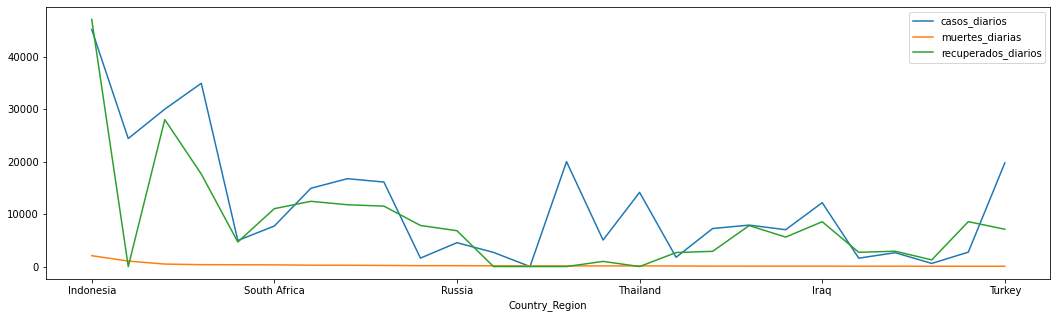

In [50]:
#13 Gráfico de líneas que muestre la cantidad de casos confirmados, fallecidos, recuperados y activos por país/región donde las muertes hayan superado los 50 casos.

# creó columnas actualizadas
report_covid_today['muertes_diarias'] = deaths
report_covid_today['recuperados_diarios'] = recovered

covid_deaths_fifty = report_covid_today['muertes_diarias'] >= 50
world_covid_deaths_fifty = report_covid_today[covid_deaths_fifty].groupby('Country_Region')[['casos_diarios','muertes_diarias','recuperados_diarios']]
world_covid_deaths_fifty.sum().sort_values(by='muertes_diarias', ascending=False).plot(figsize=(18,5))

<AxesSubplot:xlabel='Province_State'>

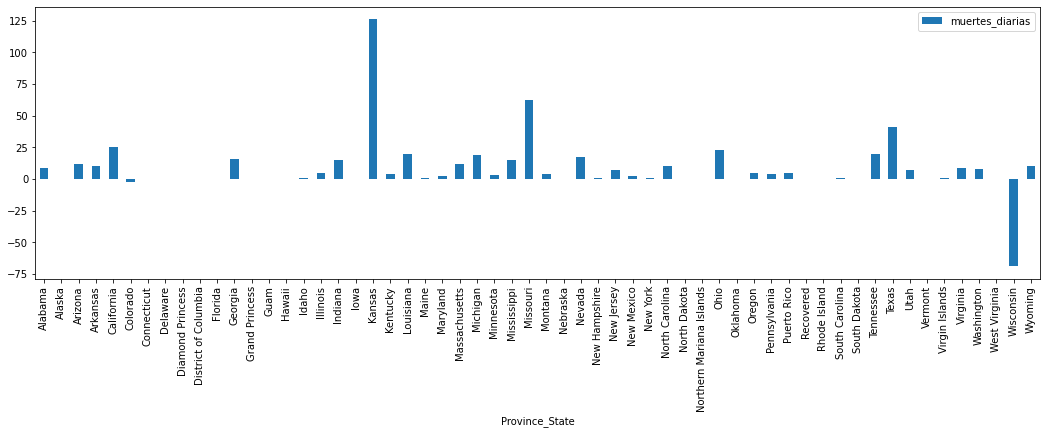

In [51]:
#14 Gráfico de barras que muestre la cantidad de fallecidos confirmados por coronavirus según provincia/estado en USA.

count_death = report_covid_today['Country_Region'] == "US"
world_count_death = report_covid_today[count_death].groupby('Province_State')[['muertes_diarias']]
world_count_death.sum().plot(figsize=(18,5), kind='bar')

<AxesSubplot:xlabel='Province_State'>

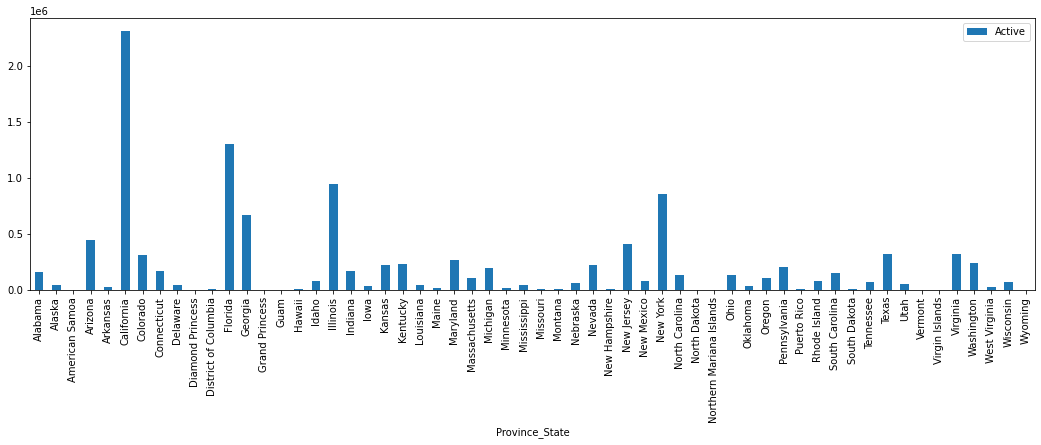

In [52]:
#15 Gráfico de barras que muestre la cantidad de casos activos según provincia/estado en USA. 'Active'

# Leemos el archivo
covid_usa = pd.read_csv("data/usa_01-01-2021.csv", usecols = (0,1,2,5,6,7,8))

covid_usa.groupby('Province_State')[['Active']].sum().plot(figsize=(18,5), kind='bar')

<AxesSubplot:xlabel='Province_State'>

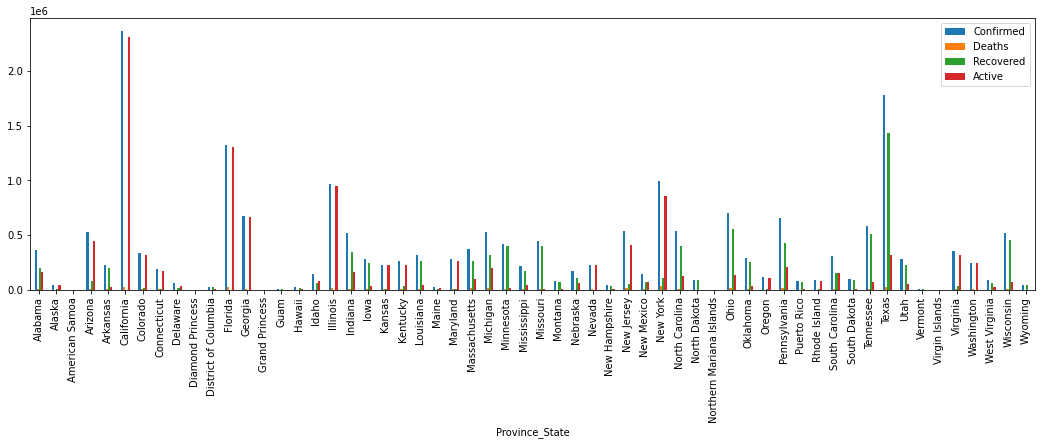

In [53]:
#16 Gráfico de barras que compare la cantidad de casos confirmados, fallecidos, recuperados y activos según provincia/estado en USA.

covid_usa.groupby('Province_State')[['Confirmed','Deaths','Recovered','Active']].sum().plot(kind='bar', figsize=(18,5))

In [54]:
#17 Gráfico que muestre la cantidad de casos confirmados en todo el mundo a través del tiempo según mes.

# utilizamos la URL del csv actual
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# leemos el archivo
confirmed = pd.read_csv(url)

# eliminamos las columnas que no nos aportan información
confirmed = confirmed.drop(columns=['Lat', 'Long','Province/State'])

# Agrupamos por Contry para luego utilizar la librería numpy y sumar los países para luego, dejarlos como cabezeras.
confirmed_group = confirmed.groupby(by='Country/Region').aggregate(np.sum).T

# indicamos que nuestro nuevo index será date
confirmed_group.index.name = 'date'

# mostramos por pantalla
confirmed_group

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/23/21,143439,132828,159563,14498,41629,1277,4827973,228382,32753,655589,...,5662838,380151,122786,4,296863,86957,315968,7003,190615,95686
7/24/21,143439,132853,160868,14498,41736,1280,4839109,228632,32918,655938,...,5694462,380311,123559,4,298804,94913,315968,7008,191527,97277
7/25/21,143439,132875,162155,14498,41780,1280,4846615,228798,33082,656270,...,5723399,380431,124290,4,299822,101173,316088,7012,192071,97894


In [55]:
#18 Número total de casos confirmados en todo el mundo.

print("Total casos confirmados: ", report_covid_today['Confirmed'].sum())

Total casos confirmados:  195329696


In [56]:
#19 Número total de fallecidos en todo el mundo.

# creo columna actualizada de muertes
report_covid_today['muertes_diarias'] = deaths

print("Total de muertes al día de hoy: ", report_covid_today['muertes_diarias'].sum())
print("Total de muertes en el mundo: ", report_covid_today['Deaths'].sum())

Total de muertes al día de hoy:  9937
Total de muertes en el mundo:  4177526


In [58]:
#20 Listado de país/región que experimentaron rebrotes (un día sin casos confirmados y luego la aparición de nuevos casos).

# creo columna con rebrotes
report_covid_today['rebrotes'] = active

country_re_covid = report_covid_today.groupby('Country_Region')[['rebrotes']].sum()
country_re_covid.head()

,rebrotes
Country_Region,
Afghanistan,685.0
Albania,17.0
Algeria,791.0
Andorra,-27.0
Angola,172.0
